# Linear Regression

### Methods

* Normalize Data (5 --> 0-1)   - Sigmoid
* Input/Output Test Data
* Predict Function
* Cost Function
* Decision Boundary (<.5 = 0, >= .5 = 1)
* Gradient Descent
* Train Loop
* Mapping function (prob > x, then Yes, otherwise No)
* Sigmoid (between 0 or 1)
* Save Model Function
* Confusion Matrix
* Charts of performance, cost
* Load Data from CSV
* Visualize + Chart data
* Get stats about it

### Links

* https://github.com/perborgen/KeepStraight/blob/master/linear.py

In [2]:
import pandas as pd
import numpy as np

In [26]:
DATA_DIR = "../data/"

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv(DATA_DIR+'Advertising.csv', header=0, usecols=[2,4])  #Returns Pandas DataFrame



In [27]:
df.head()

,Radio,Sales
0,37.8,22.1
1,39.3,10.4
2,45.9,9.3
3,41.3,18.5
4,10.8,12.9


### Metadata

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.shape

(200, 4)

In [9]:
df.TV.head()
df.Radio.head()
df.Newspaper.head()
df.Sales.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [10]:
df.Sales.mean()

14.022500000000003

### Visualize

In [11]:
import pylab

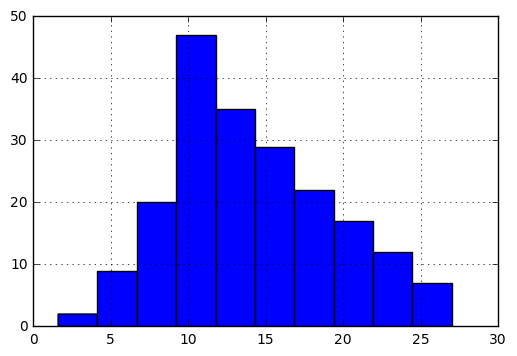

In [12]:
df['Sales'].hist()
pylab.show()

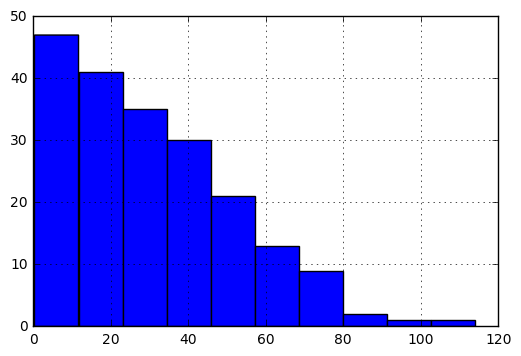

In [13]:
df['Newspaper'].hist()
pylab.show()

In [14]:
import matplotlib.pyplot as plt

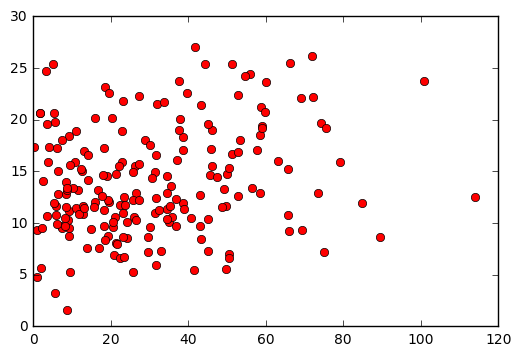

In [15]:
# Newspaper plot - MANUAL
plt.plot(df.Newspaper, df.Sales, 'ro')
#plt.axis([-1, 6, -1, 6])
plt.show()

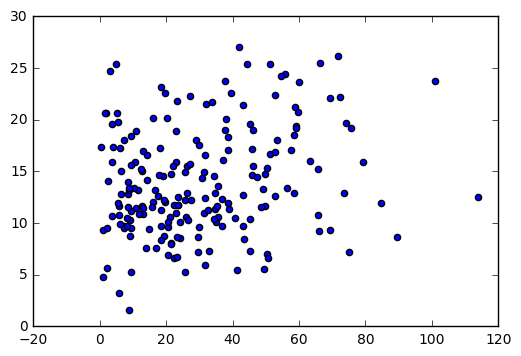

In [16]:
#Scatter plot - Automatic
plt.scatter(df.Newspaper, df.Sales)
plt.show()

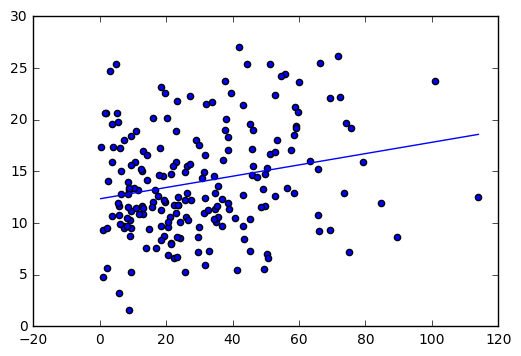

In [17]:
#Scatter plot w line - Newspaper
#http://stackoverflow.com/questions/22239691/code-for-line-of-best-fit-of-a-scatter-plot-in-python
plt.scatter(df.Newspaper, df.Sales)
plt.plot(np.unique(df.Newspaper), np.poly1d(np.polyfit(df.Newspaper, df.Sales, 1))(np.unique(df.Newspaper)))
plt.show()

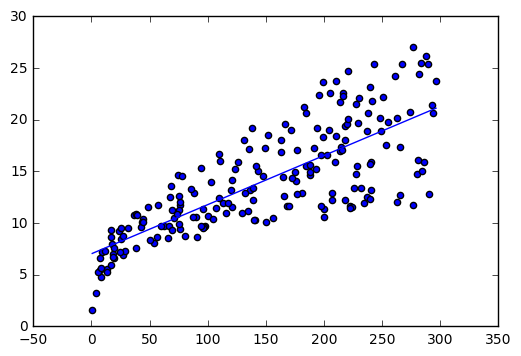

In [18]:
# TV
plt.scatter(df.TV, df.Sales)
plt.plot(np.unique(df.TV), np.poly1d(np.polyfit(df.TV, df.Sales, 1))(np.unique(df.TV)))
plt.show()

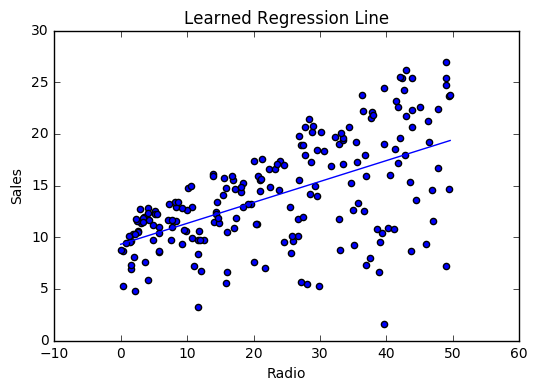

In [23]:
# Radio
plt.scatter(df.Radio, df.Sales)
plt.title('Learned Regression Line')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.plot(np.unique(df.Radio), np.poly1d(np.polyfit(df.Radio, df.Sales, 1))(np.unique(df.Radio)))
plt.show()

### Conclusion

It looks like there is correlation between Sales and all three (Newspaper, TV, Radio), but that correlation is strongest for TV.

## Dataset

In [136]:
print df.TV
# Loop through dataframe
stop = 10
for index, row in df.iterrows():
    if index > stop:
        break
    print index
    print row
    print row["TV"], row["Radio"], row["Newspaper"], row["Sales"]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
5        8.7
6       57.5
7      120.2
8        8.6
9      199.8
10      66.1
11     214.7
12      23.8
13      97.5
14     204.1
15     195.4
16      67.8
17     281.4
18      69.2
19     147.3
20     218.4
21     237.4
22      13.2
23     228.3
24      62.3
25     262.9
26     142.9
27     240.1
28     248.8
29      70.6
       ...  
170     50.0
171    164.5
172     19.6
173    168.4
174    222.4
175    276.9
176    248.4
177    170.2
178    276.7
179    165.6
180    156.6
181    218.5
182     56.2
183    287.6
184    253.8
185    205.0
186    139.5
187    191.1
188    286.0
189     18.7
190     39.5
191     75.5
192     17.2
193    166.8
194    149.7
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, dtype: float64
0
TV           230.1
Radio         37.8
Newspaper     69.2
Sales         22.1
Name: 0, dtype: float64
230.1 37.8 69.2 22.1
1
TV           44.5
Radio        39.3
Newspaper    45.1
Sal

## Single Variable Linear Regression

y = mx + b

B (bias) is called the intercept because it determines where the line intercepts the y-axis. In machine learning we can call this the bias, because it is added to offset all predictions that we make. 

M (slope) is called the slope because it defines the slope of the line or how x translates into a y value before we add our bias.

### Load Data

In [377]:
dataset = np.loadtxt(DATA_DIR+'Advertising.csv',skiprows=1, delimiter=",", usecols=(1,4))
x_vals = dataset[:,0]
y_vals = dataset[:,1]
print dataset[:5]
print x_vals[:5]
print y_vals[:5]

[[ 230.1   22.1]
 [  44.5   10.4]
 [  17.2    9.3]
 [ 151.5   18.5]
 [ 180.8   12.9]]
[ 230.1   44.5   17.2  151.5  180.8]
[ 22.1  10.4   9.3  18.5  12.9]


### Cost Function

In [477]:
def predict(x, m, b):
    return m*x + b

In [478]:
def error(x, y, m, b):
    return (y - (m*x + b))**2

In [479]:
def MSE(x_vals, y_vals, m, b):
    n = len(x_vals)
    total_error = 0.0
    for i in range(n):
        total_error += error(x_vals[i], y_vals[i], m, b)
    return total_error / n

### Gradient Descent

To minimize our error we need to calculate the gradient of our cost function. The gradient has two partial derivatives: d/dm and d/db. To find the partial derivatives of the MSE cost function, we can use Wolphram Alpha:
* [d/dm](http://tinyurl.com/zw8ydgv) = -x(b + mx - y) = x(y - (mx + b))
* [d/db](http://tinyurl.com/zujlvdj) = -(b + mx - y) = (y - (mx + b))

For each sample, we calculate the derivative, divide by N to take the mean, and subtract from the current derivative total we are calculating. The derivative equation returns the direction of steepest ASCENT, so we need to reverse this to reduce our error function. 

In [496]:
def update_weights(m, b, x_vals, y_vals, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(x_vals)
    for i in range(N):
        m_deriv -= x_vals[i] * (y_vals[i] - (m*x_vals[i] + b)) / float(N)
        b_deriv -= (y_vals[i] - (m*x_vals[i] + b)) / float(N)
    m -= m_deriv * learning_rate
    b -= b_deriv * learning_rate

    return m, b

### Train Function

In [491]:
def train(m, b, x, y, lr, num_iters):
    error_history = []
    for i in range(num_iters):
        m,b = update_weights(m, b, x, y, lr)
        error = MSE(x, y, m, b)
        error_history.append(error)
        if i % 2 == 0:
            graph_prediction_line(x, y, m, b)
            print "iter="+str(i) + "  m="+str(round(m,5)) + "  b="+str(round(b,5)) + "  cost="+str(round(error,3))
    print "iter="+str(i) + "  m="+str(round(m,5)) + "  b="+str(round(b,5)) + "  cost="+str(round(error,3))
    return m,b,error_history

### Visualize

In [492]:
def graph_error(error_history):
    iterations = [i for i in range(1,len(error_history)+1)]
    plt.plot(iterations, error_history)
    plt.title('Error Rate')
    plt.xlabel('Training Iterations')
    plt.ylabel('Mean Squared Error')
    plt.show()

In [493]:
def graph_prediction_line(x, y, m, b):
    predictions = [predict(x[i], m, b) for i in range(len(x))]
    plt.scatter(x, y)
    plt.plot(x, np.poly1d(np.polyfit(x, predictions, 1) ) (x))
    plt.title('Learned Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

### Run

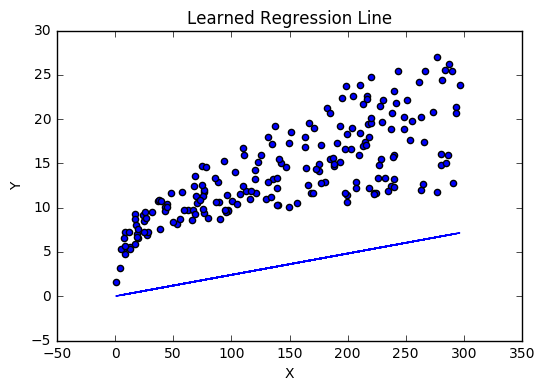

iter=0  m=0.02411  b=0.00014  cost=124.324


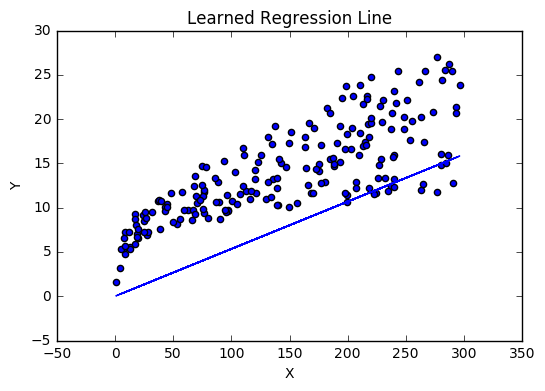

iter=2  m=0.0534  b=0.00032  cost=48.84


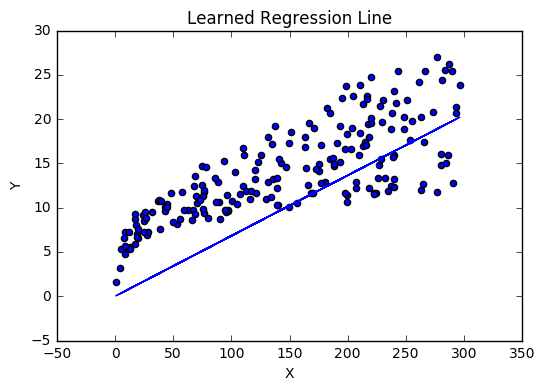

iter=4  m=0.06818  b=0.00044  cost=29.611


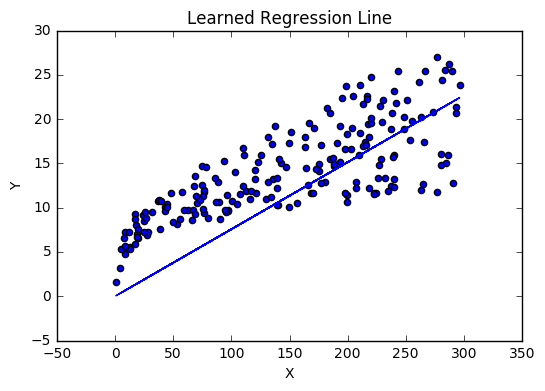

iter=6  m=0.07564  b=0.00051  cost=24.712


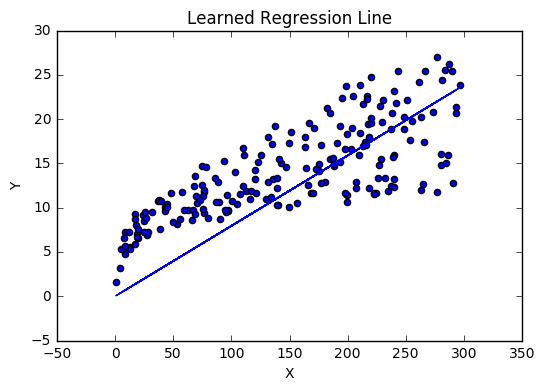

iter=8  m=0.07941  b=0.00056  cost=23.464


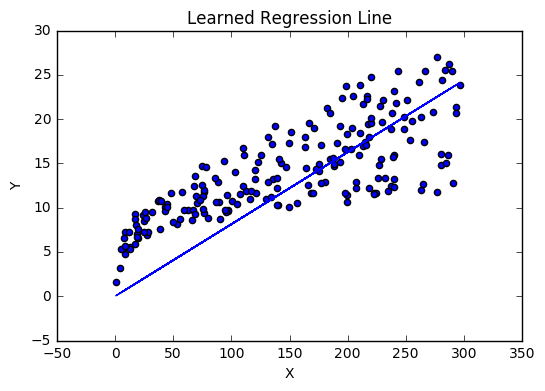

iter=10  m=0.08131  b=0.00061  cost=23.146


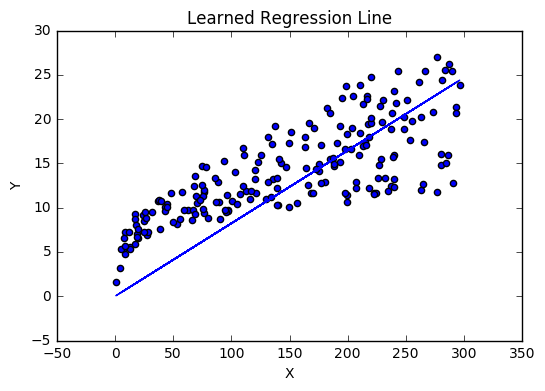

iter=12  m=0.08227  b=0.00065  cost=23.065


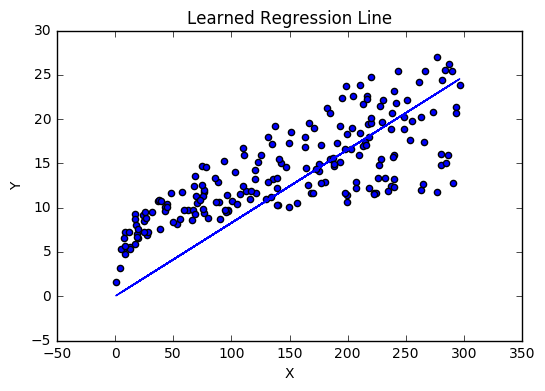

iter=14  m=0.08275  b=0.00069  cost=23.044


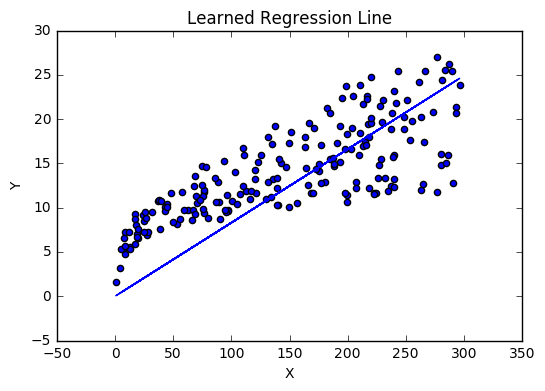

iter=16  m=0.083  b=0.00072  cost=23.039


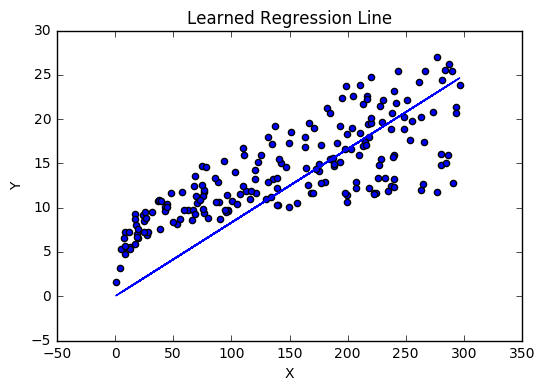

iter=18  m=0.08312  b=0.00076  cost=23.037
iter=19  m=0.08316  b=0.00078  cost=23.037


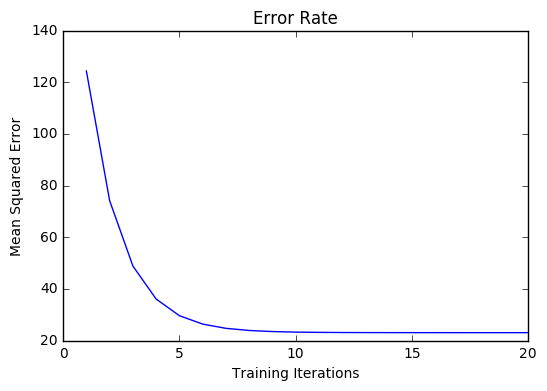

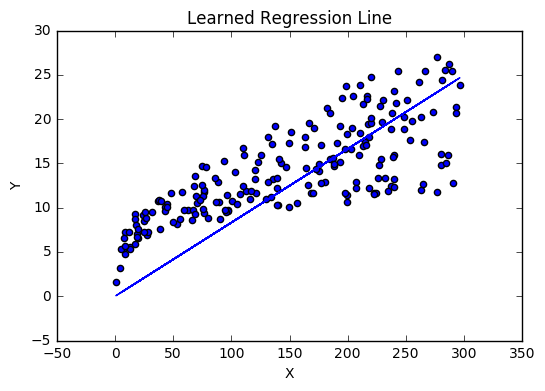

In [494]:
def run():
    x = dataset[:,0]
    y = dataset[:,1]
    
    # Initialize weights (m and b)
    m = 0.0
    b = 0.0
    
    # Hyperparameters
    learning_rate = 0.000005
    num_iters = 20
    
    m,b,errs = train(m, b, x, y, learning_rate, num_iters)

    #Chart errs
    graph_error(errs)
    graph_prediction_line(x, y, m, b)
run()

## Single Variable LR w Matrix

### Prepare Data

In [330]:
single_dataset = np.loadtxt(DATA_DIR+'Advertising.csv',skiprows=1, delimiter=",", usecols=(1,4))
print single_dataset[:5]

features = np.array([single_dataset[:,0]])
print "Features"
print features[:5]

print "Features Transposed" 
print features.T[:5]

targets = single_dataset[:,1]
print "Targets"
print targets[:5]

bias = np.ones(shape=(len(single_dataset), 1))
print "Bias"
print bias[:5]

features = np.concatenate((features.T,bias), axis=1)
print "Features w Bias"
print features[:5]

#Rows of Weights must equal Cols of Features 
weights = np.zeros(shape=(2,1))
print "Weights"
print weights

[[ 230.1   22.1]
 [  44.5   10.4]
 [  17.2    9.3]
 [ 151.5   18.5]
 [ 180.8   12.9]]
Features
[[ 230.1   44.5   17.2  151.5  180.8    8.7   57.5  120.2    8.6  199.8
    66.1  214.7   23.8   97.5  204.1  195.4   67.8  281.4   69.2  147.3
   218.4  237.4   13.2  228.3   62.3  262.9  142.9  240.1  248.8   70.6
   292.9  112.9   97.2  265.6   95.7  290.7  266.9   74.7   43.1  228.
   202.5  177.   293.6  206.9   25.1  175.1   89.7  239.9  227.2   66.9
   199.8  100.4  216.4  182.6  262.7  198.9    7.3  136.2  210.8  210.7
    53.5  261.3  239.3  102.7  131.1   69.    31.5  139.3  237.4  216.8
   199.1  109.8   26.8  129.4  213.4   16.9   27.5  120.5    5.4  116.
    76.4  239.8   75.3   68.4  213.5  193.2   76.3  110.7   88.3  109.8
   134.3   28.6  217.7  250.9  107.4  163.3  197.6  184.9  289.7  135.2
   222.4  296.4  280.2  187.9  238.2  137.9   25.    90.4   13.1  255.4
   225.8  241.7  175.7  209.6   78.2   75.1  139.2   76.4  125.7   19.4
   141.3   18.8  224.   123.1  229.5   87.2

In [284]:
print "Features Shape: " + str(features.shape)
print "Weights Shape: " + str(weights.shape)
print "F Columns = W Rows"

#Very dot product works
predictions = features.dot(weights).flatten()
print predictions[:5]

Features Shape: (200, 2)
Weights Shape: (2, 1)
F Columns = W Rows
[ 0.  0.  0.  0.  0.]


### Load Data

In [336]:
dataset = np.loadtxt(DATA_DIR+'Advertising.csv',skiprows=1, delimiter=",", usecols=(1,4))
print dataset[:5]

[[ 230.1   22.1]
 [  44.5   10.4]
 [  17.2    9.3]
 [ 151.5   18.5]
 [ 180.8   12.9]]


In [366]:
#Load into Arrays
x = dataset[:,0]
y = dataset[:,1]
print x[:5]
print y[:5]

[ 230.1   44.5   17.2  151.5  180.8]
[ 22.1  10.4   9.3  18.5  12.9]


### Create Matrix

We need to reshape x into columns, append a bias column, and design a Weights matrix that can be dot-product with the features matrix. We have 2 weights (one for b and one for x).

In [361]:
bias = np.ones(shape=(len(dataset),1))
weights = np.zeros(shape=(2,1))
features = np.reshape(x,newshape=(200,1))
features = np.append(features, bias, axis=1)
features[:5]

array([[ 230.1,    1. ],
       [  44.5,    1. ],
       [  17.2,    1. ],
       [ 151.5,    1. ],
       [ 180.8,    1. ]])

### Predict Function

In [362]:
def predict(features, weights):
    '''
    Takes (200,2) Features and (2,1) Weights matrix
    Returns 1D matrix of predictions
    '''
    return np.dot(features, weights).flatten()

predict(features, weights)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

### Cost Function

In [469]:
#Mean Squared Error
def MSE(predictions, actuals):
    # MSE = 1/N * sum( (y - pred)^2 )
    n = len(predictions)
    sq_errors = (actuals - predictions)**2
    return sq_errors.sum() / n

In [470]:
MSE(predictions, y)

223.71625

### Gradient Descent

To run gradient descent on this error function, we first need to compute its gradient. The gradient will act like a compass and always point us downhill. To compute it, we will need to differentiate our error function. Since our function is defined by two parameters (m and b), we will need to compute a partial derivative for each. These derivatives work out to be:



In [326]:
class SingleLinearRegression():
    def __init__(self, np_data):
        self.observations = np_data
        self.iterations = 1
        self.learning_rate = .01
        self.N = len(np_data)
        self.features = self.prepare_features()
        self.targets = np_data[:,1]
        self.weights = np.zeros(shape=(2,1))

    def prepare_features(self):
        features = np.array([self.observations[:,0]])
        bias_arr = np.ones(shape=(self.N, 1))
        features = np.concatenate((features.T,bias_arr),axis=1)
        return features
    
    # MSE
    def cost(self):
        # MSE = 1/N * sum( (y - pred)^2 )
        predictions = np.dot(self.features, self.weights).flatten()
        sq_errors = (targets - predictions)**2
        return (1.0 / (2 * self.N)) * sq_errors.sum()
    
    def gradient(self):
        pass
    
    def train(self):
        pass

In [327]:
SLR = SingleLinearRegression(single_dataset)
print SLR.prepare_features()[:5]

[[ 230.1    1. ]
 [  44.5    1. ]
 [  17.2    1. ]
 [ 151.5    1. ]
 [ 180.8    1. ]]


In [328]:
mse = SLR.cost()
print mse

111.858125


In [172]:

print SLR.cost()

ValueError: operands could not be broadcast together with shapes (200,) (400,) 

[   0.7    4.1    5.4    7.3    7.8    8.4    8.6    8.7   11.7   13.1
   13.2   16.9   17.2   17.9   18.7   18.8   19.4   19.6   23.8   25.
   25.1   25.6   26.8   27.5   28.6   31.5   36.9   38.    38.2   39.5
   43.    43.1   44.5   44.7   48.3   50.    53.5   56.2   57.5   59.6
   62.3   66.1   66.9   67.8   68.4   69.    69.2   70.6   73.4   74.7
   75.1   75.3   75.5   76.3   76.4   78.2   80.2   85.7   87.2   88.3
   89.7   90.4   93.9   94.2   95.7   96.2   97.2   97.5  100.4  102.7
  104.6  107.4  109.8  110.7  112.9  116.   117.2  120.2  120.5  121.
  123.1  125.7  129.4  131.1  131.7  134.3  135.2  136.2  137.9  139.2
  139.3  139.5  140.3  141.3  142.9  147.3  149.7  149.8  151.5  156.6
  163.3  163.5  164.5  165.6  166.8  168.4  170.2  171.3  172.5  175.1
  175.7  177.   180.8  182.6  184.9  187.8  187.9  188.4  191.1  193.2
  193.7  195.4  197.6  198.9  199.1  199.8  202.5  204.1  205.   206.8
  206.9  209.6  210.7  210.8  213.4  213.5  214.7  215.4  216.4  216.8
  217.7 

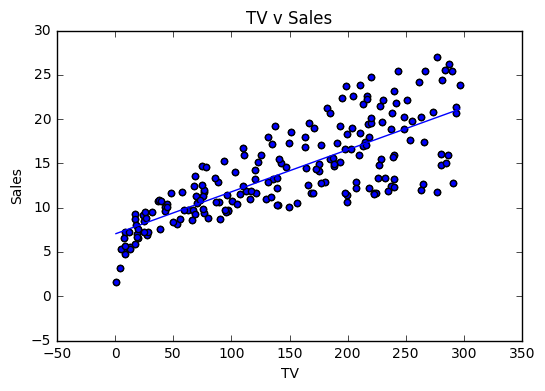

In [144]:
# TV vs Sales
plt.scatter(SLR.x_arr, SLR.y_arr)
plt.title('TV v Sales')
plt.xlabel('TV')
plt.ylabel('Sales')
print np.unique(SLR.x_arr)
print np.polyfit(SLR.x_arr.flatten(), SLR.y_arr, 1)
plt.plot(np.unique(SLR.x_arr), np.poly1d(np.polyfit(SLR.x_arr.flatten(), SLR.y_arr, 1).flatten())(np.unique(SLR.x_arr)))
plt.show()

## Multi-Variable Linear Regression

In [125]:
class LinearRegression():
    def __init__(self, datasetDF, learning_rate=.01):
        self.learning_rate = learning_rate
        self.news_weight = 0.1
        self.tv_weight = 0.1
        self.radio_weight = 0.1
        self.bias = 0.1
        self.observations = datasetDF
        self.features = datasetDF.as_matrix(["TV","Radio","Newspaper"])
        self.output = datasetDF.as_matrix(["Sales"]) 
        self.predictions = None #holds predictions from last train iteration?
    
    #Model/Equation
    #y = news_weight(Newspaper) + tv_weight(TV) + radio_weight(Radio) + bias
        
    def get_predictions_container(self):
        return pd.DataFrame(
            columns=["TV","Radio","Newspaper","Pred","Sales","Error"])
    
    # Predict
    def predict_equation(self, observation):
        return + self.tv_weight * observation["TV"] \
            #+ self.radio_weight * observation["Radio"] \
            #+ self.news_weight * observation["Newspaper"] \
            #+ self.bias
    
    def build_weights_matrix(self):
        

    # Error/Cost
    # MSE - Mean Squared Error
    # 1/N sum((y-pred^2))
    # Why do we square again?
    
    def cost(self, pred, y):
        return (y-pred)**2
    
    def sigmoid(self):
        pass
    
    def gradient(self):
        pass
    
    #Loop through DataFrame observations
    def train(self, observations):
        
        predictions = []
        squared_error_sum = 0
        for index, observation in observations.iterrows():
            pred = self.predict(observation)
            error = self.cost(pred, observation["Sales"])
            squared_error_sum += error
            predictions.append([observation["TV"], observation["Radio"], 
                                     observation["Newspaper"], pred, observation["Sales"],
                                     error])
        mean_squared_error = squared_error_sum / len(observations) 
        print "MSE: "+str(mean_squared_error)
        self.predictions = pd.DataFrame(predictions,
            columns=["TV","Radio","Newspaper","Pred","Sales","Error"])
        return mean_squared_error
        
    def test(self):
        self.train(self.observations)
        

In [126]:
LR = LinearRegression(df)
LR.test()
LR.predictions.head()

MSE: 31.1638295


,TV,Radio,Newspaper,Pred,Sales,Error
0,230.1,37.8,69.2,23.01,22.1,0.8281
1,44.5,39.3,45.1,4.45,10.4,35.4025
2,17.2,45.9,69.3,1.72,9.3,57.4564
3,151.5,41.3,58.5,15.15,18.5,11.2225
4,180.8,10.8,58.4,18.08,12.9,26.8324


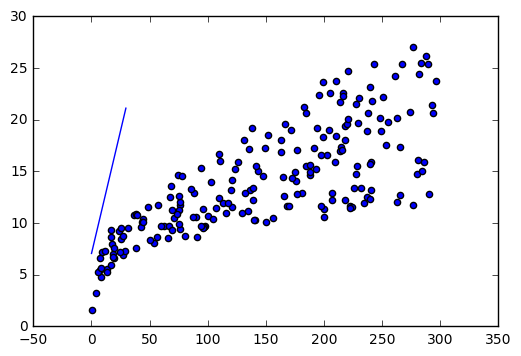

In [124]:
# Predict Slope using TV vs Sales
plt.scatter(LR.predictions.TV, LR.predictions.Sales)
plt.plot(np.unique(LR.predictions.Pred), 
         np.poly1d(np.polyfit(LR.predictions.Pred, 
                              LR.predictions.Sales, 1))(np.unique(LR.predictions.Pred)))
plt.show()